# <h1 style="padding:10px; background-color:#0f4c5c; margin:0; color:white; font-family:newtimeroman; font-size:300%; text-align:center;border-radius: 25px 25px; overflow:hidden; font-weight:500">Estudo Seaborn<br></h1>

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Estudo Básico / Projeto </h1>

Nosso projeto se trata de gorjetas, e sabemos que no Brasil as pessoas pagam 10% do valor da conta como gorjeta ou caixinha dos funcionários, de forma opcional. Em outros países, este valor é livre e fica a critério do cliente, ou seja, não há uma porcentagem exata estabelecida.

In [161]:
import pandas as pd
import seaborn as sns

In [162]:
dados = pd.read_csv('dados/tips.csv')
dados

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


### traduzindo colunas

In [163]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [164]:
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [165]:
gorjeta = dados.rename(columns= renomear)

In [166]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [167]:
gorjeta.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [168]:
sim_nao = {'No': 'Não', 'Yes': 'Sim'}

In [169]:
gorjeta.sobremesa = gorjeta.sobremesa.map(sim_nao)

In [170]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [171]:
gorjeta.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [172]:
dia_da_semana = {
    'Sun': 'Dom',
    'Sat': 'Sab',
    'Thur': 'Qui',
    'Fri': 'Sex'
}

In [173]:
gorjeta.dia_da_semana = gorjeta.dia_da_semana.map(dia_da_semana)

In [174]:
gorjeta.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [175]:
hora_do_dia={'Dinner': 'Jantar', 'Lunch': 'Almoco'}

In [176]:
gorjeta.hora_do_dia = gorjeta.hora_do_dia.map(hora_do_dia)

In [177]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Explorando os Dados </h1>

seaborn: statistical data visualization 

url: https://seaborn.pydata.org/

In [178]:
import seaborn as sns

In [179]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [180]:
shape = gorjeta.shape

print(f'A base de dados contém {shape[0]} registros\n')
print(f'Registros não nulos:')
gorjeta.isnull().sum()

A base de dados contém 244 registros

Registros não nulos:


valor_da_conta      0
gorjeta             0
sobremesa           0
dia_da_semana       0
hora_do_dia         0
total_de_pessoas    0
dtype: int64

In [181]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Dom,Jantar,2


In [182]:
gorjeta['porcentagem'] = gorjeta['gorjeta'] / gorjeta.valor_da_conta

In [183]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.059447


In [184]:
gorjeta.porcentagem = gorjeta.porcentagem.round(2)

In [185]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 1 - Valor de Conta e Gorjeta </h1>

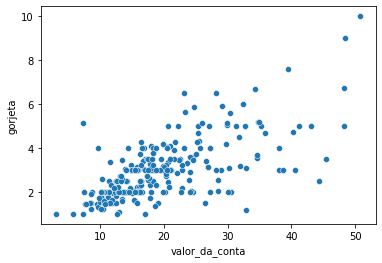

In [186]:
valor_gorjeta = sns.scatterplot(x= 'valor_da_conta', y= 'gorjeta', data= gorjeta)


**Visualmente o valor da gorjeta aumenta com fome o valor da conta**

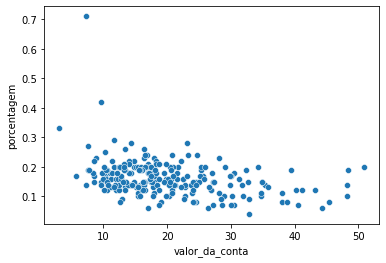

In [187]:
porcentagem_conta = sns.scatterplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem')

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

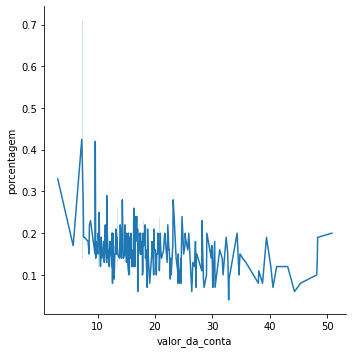

In [188]:
sns.relplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem', kind= 'line')

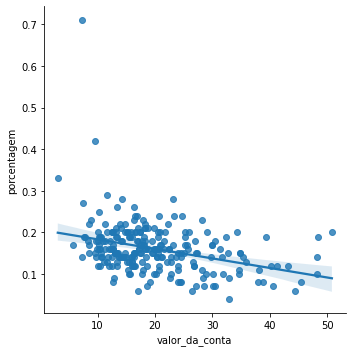

In [189]:
sns.lmplot(data= gorjeta, x= 'valor_da_conta', y= 'porcentagem')

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 2 - Sobremesa </h1>

In [190]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


In [191]:
gorjeta[gorjeta.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [192]:
gorjeta[gorjeta.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


### Análise Visual

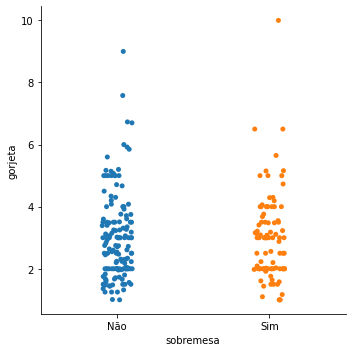

In [193]:
sns.catplot(data= gorjeta, x='sobremesa', y='gorjeta')

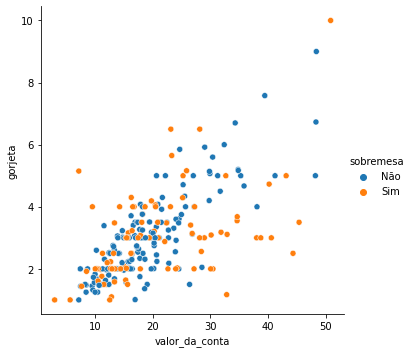

In [194]:
sns.relplot(data= gorjeta, x='valor_da_conta', y='gorjeta', hue= 'sobremesa')

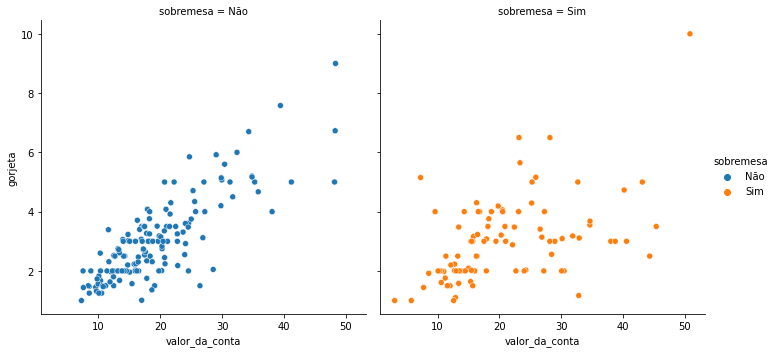

In [195]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa'
)

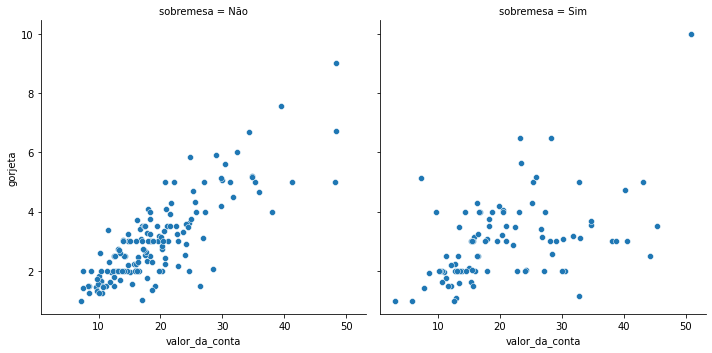

In [196]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    col= 'sobremesa'
)

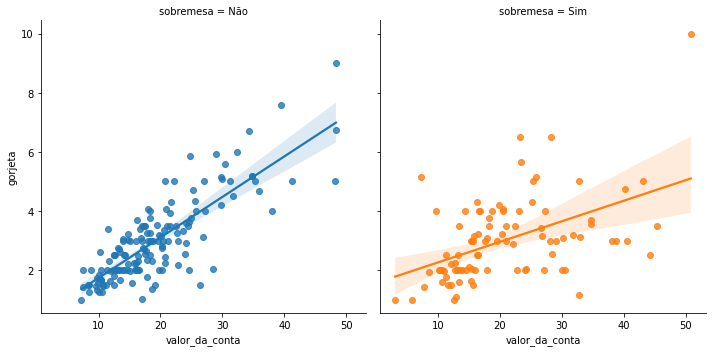

In [197]:
sns.lmplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa'
)

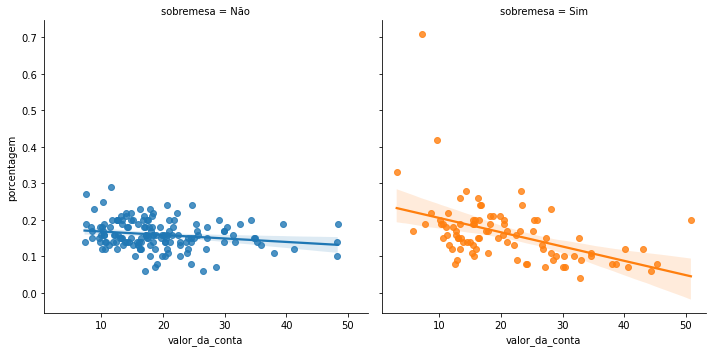

In [198]:
sns.lmplot(
    data= gorjeta,
    x='valor_da_conta',
    y='porcentagem',    # add porcentagem
    hue= 'sobremesa',
    col= 'sobremesa'
)

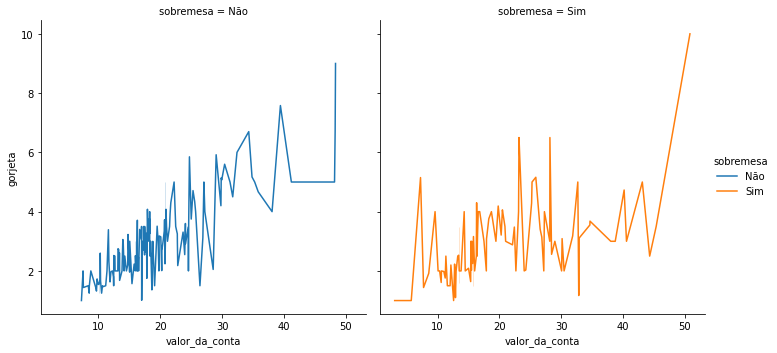

In [199]:
sns.relplot(
    data= gorjeta,
    x='valor_da_conta',
    y='gorjeta',
    hue= 'sobremesa',
    col= 'sobremesa',
    kind= 'line'
)

**Visualmente, existe diferença no valor da gorjeta daqueles que pediram ou não sobremesa**

### Teste de Hipótese

**H<sup>null</sup>**

> A distribuição da taxa da gorjeta é a mesma nos dois grupos

**H<sup>alt</sup>**
> A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [200]:
from scipy.stats import ranksums

In [201]:
sobremesa = gorjeta.query('sobremesa == "Sim"').porcentagem

In [202]:
sem_sobremesa = gorjeta.query('sobremesa == "Não"').porcentagem

In [203]:
r = ranksums(sobremesa, sem_sobremesa)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [204]:
print(f'O valor de pvalue: {r.pvalue}')

O valor de pvalue: 0.5266635660124415


Como o valor de pvalue foi aproximadamente 0.52, podemos falar que a hipótese é nula, ou seja, a distribuição da taxa da gorjeta é a mesma nos dois grupos

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 3 - Dia da Semana </h1>

In [205]:
gorjeta.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06


In [206]:
gorjeta.dia_da_semana.unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

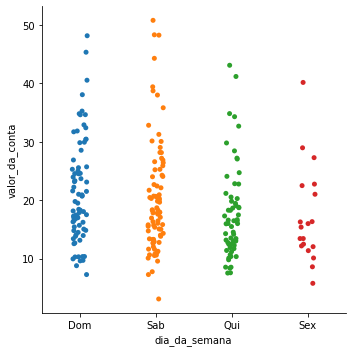

In [207]:
sns.catplot(
    data= gorjeta,
    x= 'dia_da_semana',
    y = 'valor_da_conta'
)

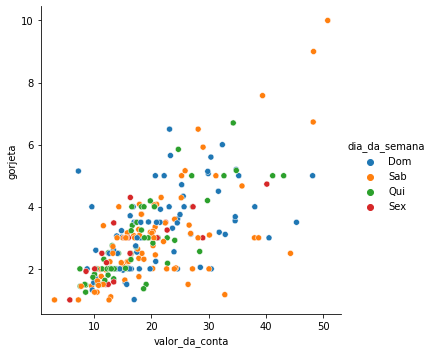

In [208]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana'
)

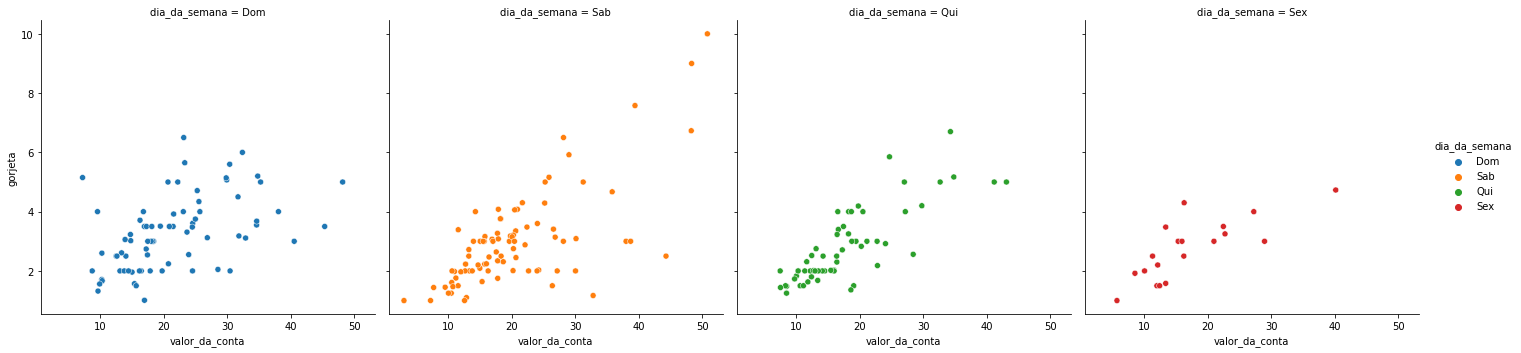

In [209]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

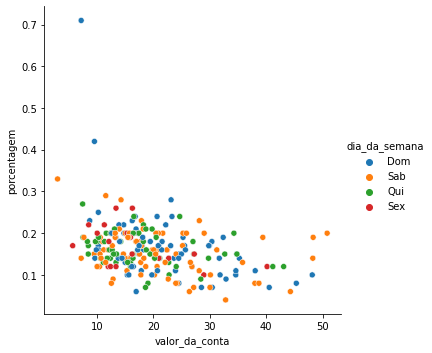

In [210]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana'
)

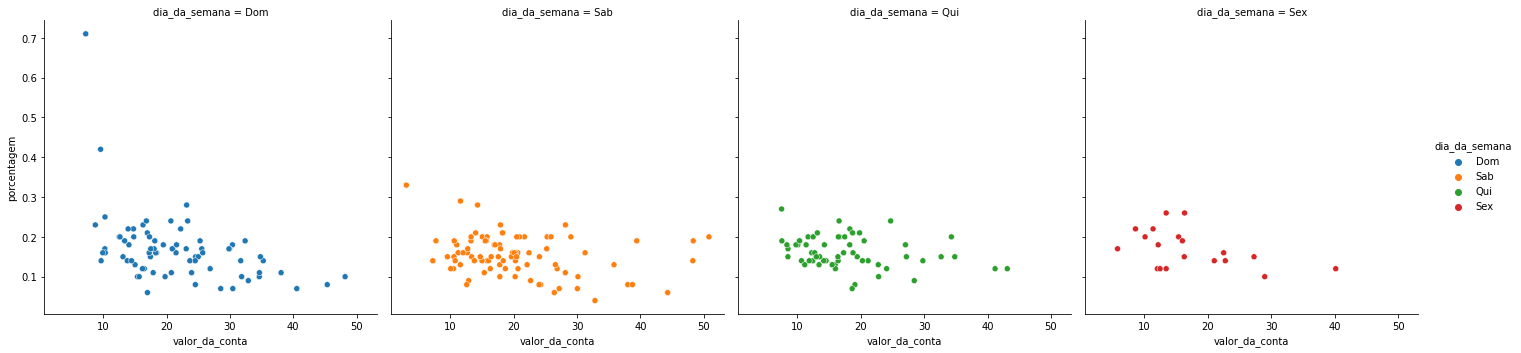

In [211]:
sns.relplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

lmplot <hr>

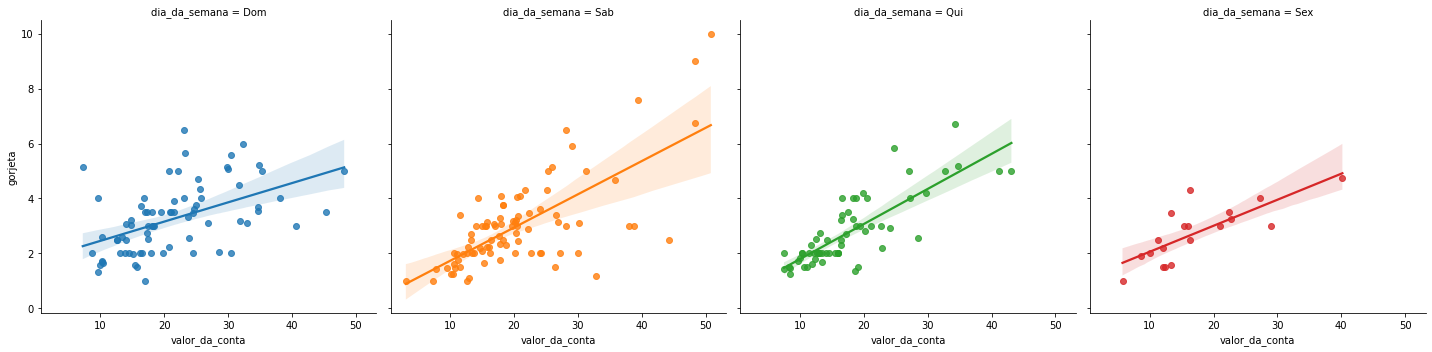

In [212]:
sns.lmplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'gorjeta',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

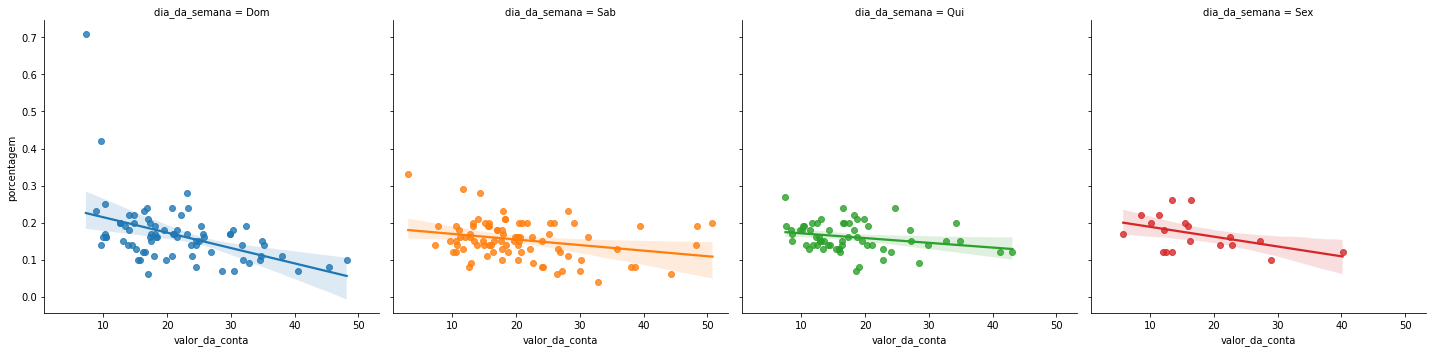

In [213]:
sns.lmplot(
    data= gorjeta,
    x= 'valor_da_conta',
    y = 'porcentagem',
    hue= 'dia_da_semana',
    col= 'dia_da_semana'
)

### Análise Descritiva <hr>

In [214]:
media_geral_gorjeta = gorjeta.gorjeta.mean()

In [215]:
print(f'A média geral: {media_geral_gorjeta}')

A média geral: 2.99827868852459


In [216]:
gorjeta_media = gorjeta.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]
gorjeta_media

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Dom,21.410000,3.255132,0.166974
Qui,17.682742,2.771452,0.161129
Sab,20.441379,2.993103,0.153678
Sex,17.151579,2.734737,0.169474


In [217]:
print('Frequencia dos dias:')
gorjeta.dia_da_semana.value_counts()

Frequencia dos dias:


Sab    87
Dom    76
Qui    62
Sex    19
Name: dia_da_semana, dtype: int64

### Teste de Hipótese

**H<sup>null</sup>**
> A distribuição do valor da conta é igual no sábado e no domingo

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no sábado e no domingo

In [218]:
conta_dom = gorjeta.query('dia_da_semana == "Dom"').valor_da_conta
conta_sab = gorjeta.query('dia_da_semana == "Sab"').valor_da_conta

In [219]:
r2 = ranksums(conta_dom, conta_sab)

In [220]:
print(f'O valor do p-value: {r2.pvalue}')

O valor do p-value: 0.3576728477868443


A distribuição do valor da conta **é igual no sabádo e no domingo**

In [229]:
conta_qui = gorjeta.query('dia_da_semana == "Qui"').valor_da_conta

In [232]:
r3 = ranksums(conta_qui, conta_sab)
print(f'O valor do p-value: {r3.pvalue}')

O valor do p-value: 0.046688533353323416


Rejeita a hipótese nula, adotando que a distribuição do valor da conta não é igual na quinta e no sábado para fins práticos

## <h1 style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 25px 25px;overflow:hidden;font-weight:500"> Análise 4 - Hora do Dia </h1>

In [233]:
gorjeta.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17


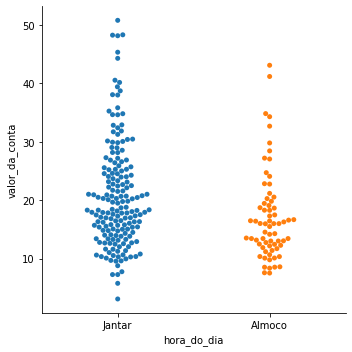

In [235]:
sns.catplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
    kind= 'swarm'
)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

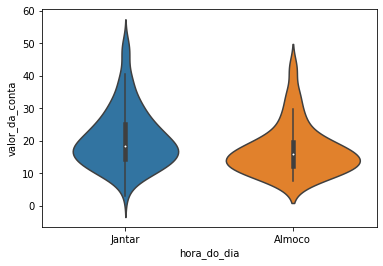

In [236]:
sns.violinplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

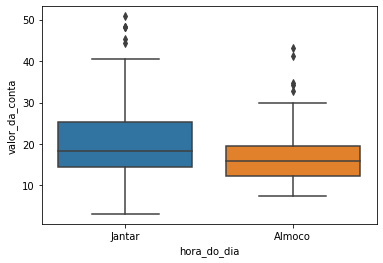

In [237]:
sns.boxplot(
    data= gorjeta,
    x= 'hora_do_dia',
    y= 'valor_da_conta',
)

In [239]:
gorjeta.hora_do_dia.value_counts()

Jantar    176
Almoco     68
Name: hora_do_dia, dtype: int64

In [244]:
almoco = gorjeta.query('hora_do_dia == "Almoco"').valor_da_conta
jantar = gorjeta.query('hora_do_dia == "Jantar"').valor_da_conta

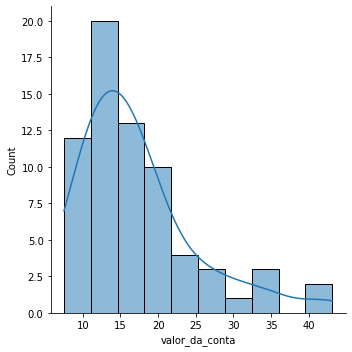

In [243]:
sns.displot(almoco, kde= True)

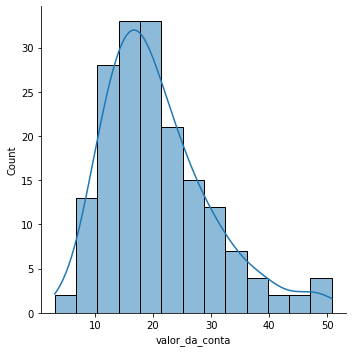

In [246]:
sns.displot(jantar, kde= True)

### Teste de Hipótese <hr>

In [248]:
gorjeta.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoco,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**H<sup>null</sup>**
> A distribuição do valor da conta é igual no almoço e no jantar

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no almoço e no jantar

In [250]:
r4 = ranksums(jantar, almoco)
print(f'O valor de p-value é: {r4.pvalue}')

O valor de p-value é: 0.0011791039723641672


Como p-value é menor que 0.05 entáo a hipótese é:

**H<sup>alt</sup>**
> A distribuição do valor da conta não é igual no almoço e no jantar

In [254]:
per_almoco = gorjeta.query('hora_do_dia == "Almoco"').porcentagem
per_jantar = gorjeta.query('hora_do_dia == "Jantar"').porcentagem

In [255]:
r4 = ranksums(per_almoco, per_jantar)
print(f'O valor de p-value é: {r4.pvalue}')

O valor de p-value é: 0.2602493995587126


Como p-value é maior que 0.05 entáo a hipótese é:

**H<sup>null</sup>**
> A distribuição do valor da conta é igual no almoço e no jantar